In [2]:
%matplotlib inline

from utils import ModelImporter, Preprocessing
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pre = Preprocessing('fer2013')
pre.load_data(filename='train_expanded_c1_rot.csv', name='train')

X_df = pre.get(name='train').drop(columns=['emotion'])
y_df = pre.get(name='train')['emotion']

In [8]:
train_df = pre.get(name='train')

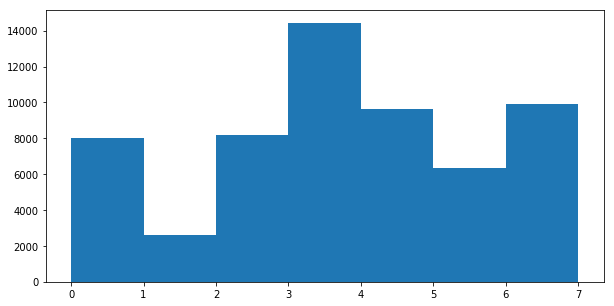

In [4]:
plt.figure(1, figsize=(10, 5))
plt.hist(y_df.values, bins = [0, 1, 2, 3, 4, 5, 6, 7])
plt.show()

In [34]:
from torch.utils.data import WeightedRandomSampler, DataLoader, TensorDataset

In [130]:
batc_size = 64
n_classes = 7
weights = [1./n_classes, 1./n_classes, 1./n_classes, 1./n_classes, 1./n_classes, 1./n_classes, 1./n_classes]
#weights = [1, 1, 1, 1, 1, 1, 1]
sampler = WeightedRandomSampler(weights, batc_size, replacement=True)

In [163]:
class_sample_count = np.array([len(np.where(y_df.values==t)[0]) for t in np.unique(y_df.values)])
#class_sample_count = np.array([100, 100, 100, 100, 100, 100, 100])
class_sample_count

array([ 7990,  2616,  8194, 14430,  9660,  6342,  9930])

In [174]:
#weight = np.array([1./n_classes, 1./n_classes, 1./n_classes, 1./n_classes, 1./n_classes, 1./n_classes, 1./n_classes])
weight = 1./class_sample_count
weight

array([1.25156446e-04, 3.82262997e-04, 1.22040517e-04, 6.93000693e-05,
       1.03519669e-04, 1.57678966e-04, 1.00704935e-04])

In [175]:
samples_weight = np.array([weight[t] for t in y_df.values])
samples_weight

array([0.00012516, 0.00012516, 0.00012204, ..., 0.00038226, 0.00038226,
       0.00038226])

In [176]:
len(samples_weight)

59162

In [166]:
samples_weight_t = torch.from_numpy(samples_weight).double()
samples_weight_t

tensor([0.0001, 0.0001, 0.0001,  ..., 0.0004, 0.0004, 0.0004],
       dtype=torch.float64)

In [167]:
sampler = WeightedRandomSampler(samples_weight, batc_size, replacement=True)

In [168]:
data = torch.tensor(X_df.values, device='cpu', dtype=torch.float)
data = data.reshape(data.shape[0], 1, 48, 48)
target = torch.tensor(y_df.values, device='cpu', dtype=torch.float)

In [169]:
trainDataset = TensorDataset(torch.FloatTensor(data), torch.FloatTensor(target))

In [170]:
trainLoader = DataLoader(dataset = trainDataset, batch_size=batc_size, sampler = sampler)

In [171]:
#for data, labels in trainLoader:
#    print(labels, len(labels))
#    print(np.array([len(np.where(labels.numpy()==t)[0]) for t in np.unique(labels.numpy())]))

In [173]:
for epoch in range(50):
    for data, labels in trainLoader:
        print(np.array([len(np.where(labels.numpy()==t)[0]) for t in np.unique(labels.numpy())]))

[ 8  4  7  8 13 13 11]
[14  9 11  4  5  8 13]
[11  7  8  5 15 10  8]
[11 10  9  9  8 10  7]
[ 7  8  8  5 12 11 13]
[ 9 10 16 10  8  5  6]
[10  8 12  6  8 10 10]
[ 8  8  9  8 12 17  2]
[13  6  5 12 12  7  9]
[ 5  7 10 15  8 16  3]
[10 10 10 10  9  6  9]
[ 5  9 10  4 15  8 13]
[11  6 11  4  9  9 14]
[ 8  8  7  9 13  5 14]
[10 14  6 12  7  4 11]
[ 7  5 10 10 13 11  8]
[14 11  6  9  6  7 11]
[ 9  7  7  7 12 13  9]
[16  6 12 11 12  4  3]
[13  9  9 10  7  8  8]
[12  7  8 10  8 10  9]
[ 5  4 15  8  8 10 14]
[ 5 11  8 10  8 10 12]
[ 6  8  9 12  9  9 11]
[ 7 11 11 10  9  8  8]
[ 5  9 10  8 16  8  8]
[11  9  6 10 14  8  6]
[10  8 10 14 11  5  6]
[ 7 11 10 10 12  7  7]
[ 7 14  7 11  8  9  8]
[13  6  5  8 10 10 12]
[ 8 12  9  8  5 12 10]
[13  8 10  6 11 11  5]
[ 3  8 12 13  8  6 14]
[ 9 14  8  5  8  9 11]
[ 8  7  6 14  8 11 10]
[14 11 13 10  6  6  4]
[ 9  8 13 11  9  9  5]
[13 10  7  5 15  7  7]
[ 8 14  8 11  4 11  8]
[ 9 11  7  6  8 15  8]
[ 9 10  6  5 16  6 12]
[16  5  6  9  7 11 10]
[10  9 12  